In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [4]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

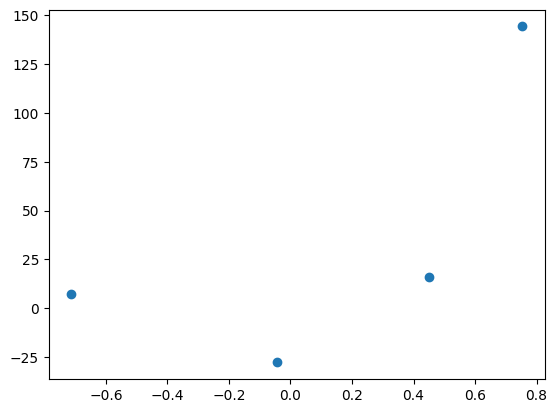

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [27]:
# Lets apply OLS(Ordinary Least Squares)
from sklearn.linear_model import LinearRegression

In [30]:
model.fit(X,y)

NameError: name 'model' is not defined

In [31]:
model.coef_

NameError: name 'model' is not defined

In [32]:
model.intercept_

NameError: name 'model' is not defined

NameError: name 'model' is not defined

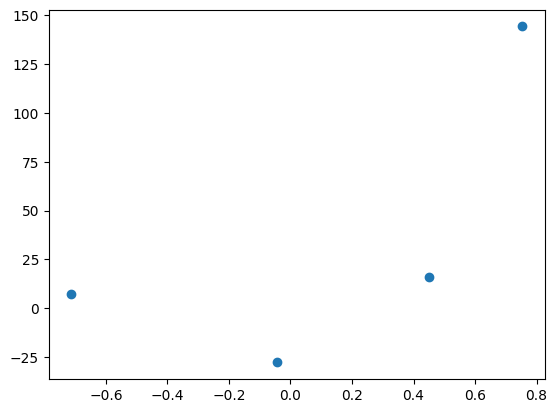

In [15]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red')

In [18]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and lets assume the starting value for intercept b = 0
y_pred = ((78.35*X)+0).reshape(4)
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

NameError: name 'model' is not defined

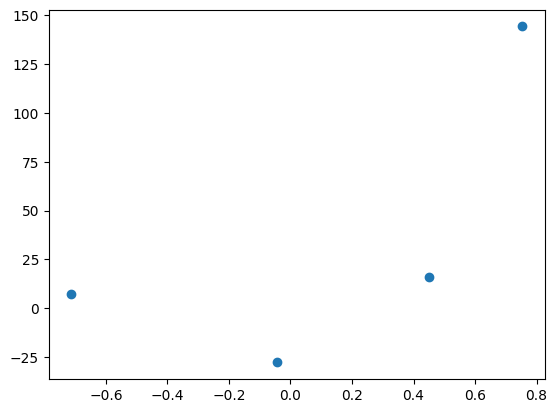

In [19]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b=0')

In [22]:
# Iteration-1
m = 78.35
b = 0
loss_slope = -2 * np.sum(y - m*X.ravel() - b)  # dL/db
loss_slope

-209.27763408209216

In [23]:
# Let take learning rate 0.1
lr = 0.1
# lr*slope = step_size
step_size = loss_slope*lr
step_size

-20.927763408209216

In [24]:
# Calculating the new intercept  bnew
b = b - step_size
b

20.927763408209216

NameError: name 'model' is not defined

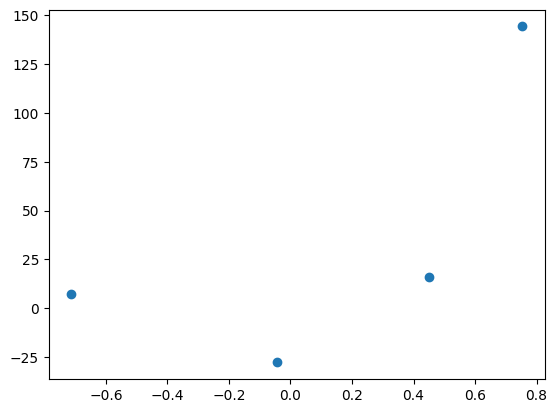

In [25]:
y_pred1 = ((78.35 *X) +b).reshape(4)

plt.scatter(X,y)
plt.plot(X, model.predict(X),color='red', label='OLS')
plt.plot(X,y_pred1,color='#6483749',label='b={}'.format(b))
plt.plot(X,y_pred, color='#A67y',label='b=0')
plt.legend()
plt.show()

In [35]:
# Iteration-2
loss_slope = -2 * np.sum(y-m*X.ravel()-b)
loss_slope

-41.85552681641843

In [36]:
step_size =lr * loss_slope
step_size

-4.185552681641844

In [37]:
b = b-step_size
b

25.11331608985106

In [39]:
y_pred2 = ((78.35*X)+b).reshape(4)
y_pred2

array([-30.70249228,  60.51281283,  21.6264999 ,  84.17091186])

NameError: name 'model' is not defined

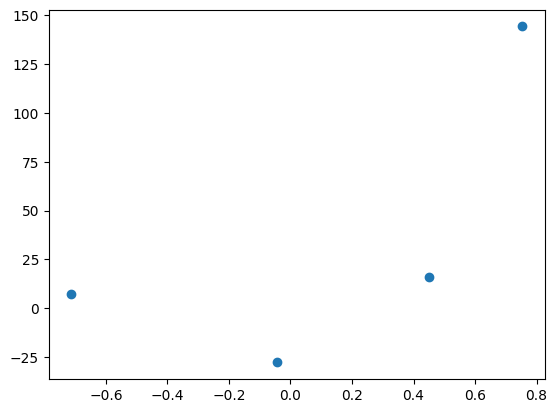

In [41]:
plt.scatter(X,y)
plt.plot(X, model.predict(X),color='red', label='OLS')
plt.plot(X,y_pred2,color='green',label='b={}'.format(b))
plt.plot(X,y_pred1,color='#6483749',label='b={}'.format(b))
plt.plot(X,y_pred, color='#A67y',label='b=0')
plt.legend()
plt.show()

In [43]:
# Iteration-3
loss_slope = -2 * np.sum(y- m*X.ravel() -b)
loss_slope

-8.371105363283675

In [44]:
step_size = lr*loss_slope
step_size

-0.8371105363283675

In [45]:
b = b - step_size
b
# very close to 26.15

25.95042662617943

In [46]:
y_pred3 = ((78.35*X)+b).reshape(4)
y_pred3

array([-29.86538175,  61.34992337,  22.46361044,  85.00802239])

NameError: name 'model' is not defined

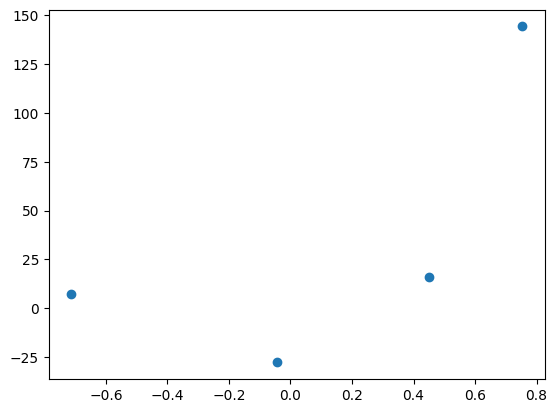

In [47]:
plt.scatter(X,y)
plt.plot(X, model.predict(X),color='red', label='OLS')
plt.plot(X,y_pred3,color='pink',label='b={}'.format(b))
plt.plot(X,y_pred2,color='green',label='b={}'.format(b))
plt.plot(X,y_pred1,color='#6483749',label='b={}'.format(b))
plt.plot(X,y_pred, color='#A67y',label='b=0')
plt.legend()
plt.show()

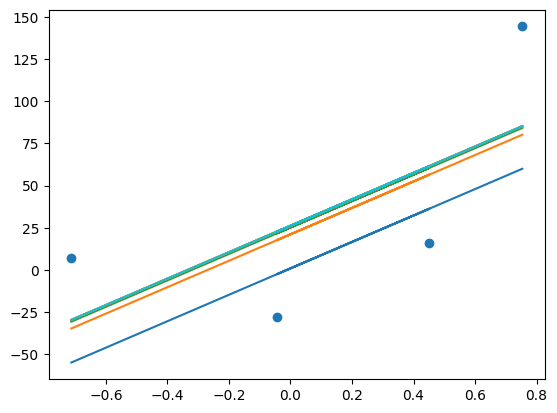

In [54]:
b = -100
m = 78.35
lr = 0.1

epochs = 10

for i in range(epochs):
    loss_slope = -2 * np.sum(y-m*X.ravel()-b)
    b = b - (loss_slope*lr)

    y_pred = m*X + b

    plt.plot(X, y_pred)
plt.scatter(X,y)


## creating our own classes and methods

In [59]:
X,y =make_regression(n_samples=100, n_features=1,n_informative=1,n_targets=1, noise=20)

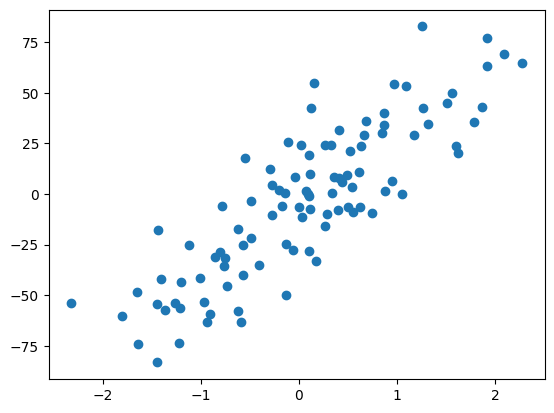

In [60]:
plt.scatter(X,y)

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [111]:
lr =LinearRegression()

In [112]:
lr.fit(X_train,y_train)

LinearRegression()

In [113]:
print(lr.coef_)
print(lr.intercept_)

[30.66663521]
-2.697251046455075


In [116]:
from sklearn.model_selection import cross_val_score
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
# np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.6718701035849939

In [117]:
class GDRegressor:

    def __init__(self, learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calculate b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m = -2 * np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            
            self.b = self.b - (loss_slope_b * self.lr)
            self.m = self.m - (loss_slope_m * self.lr)
            
            # print(self.m,self.b)
        print(self.b,self.m)
    def predict(self,X):
        return self.m * X + self.b


In [118]:
gd = GDRegressor(0.001,50)

In [119]:
gd.fit(X_train,y_train)
# b value after all epochs comes out to be very close to original b value

-2.8030347707976526 30.789376612934003


In [121]:
y_pred=gd.predict(X_test)
# from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6755597375282039

In [108]:
gd.predict(X)

array([[-52.58424698],
       [-31.62558306],
       [ -4.08524644],
       [-35.73208701],
       [ 44.4382624 ],
       [ 19.43208527],
       [-30.9489764 ],
       [  7.84003899],
       [-29.82832079],
       [ -0.94037093],
       [ 15.14506927],
       [ 23.69563776],
       [  4.1467808 ],
       [-29.23758277],
       [  0.66248589],
       [ 36.48830296],
       [ 30.64652148],
       [ 17.31700495],
       [-51.18037679],
       [ -1.83970556],
       [-14.04165745],
       [ 38.14306649],
       [  8.22085118],
       [-58.90335684],
       [ -5.18329718],
       [ 53.55971887],
       [ 63.5176749 ],
       [-36.79016248],
       [-45.0911216 ],
       [-52.73987174],
       [  6.47133615],
       [ -7.20069181],
       [-25.54012086],
       [  8.4466987 ],
       [-18.38406562],
       [-25.37180779],
       [ 57.93736727],
       [ -9.51828827],
       [-23.12650711],
       [-44.64883316],
       [ -6.57850888],
       [-23.67625056],
       [-30.28747518],
       [ 57

In [127]:
b = -120
m = 100
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30
                                                                
for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j]-(m * X[j]) - b)
        slope_m = slope_m - 2*(y[j]-(m * X[j]) - b)*X[j]
        cost = cost + (y[j] - m*X[j]-b)**2
    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)
    
        



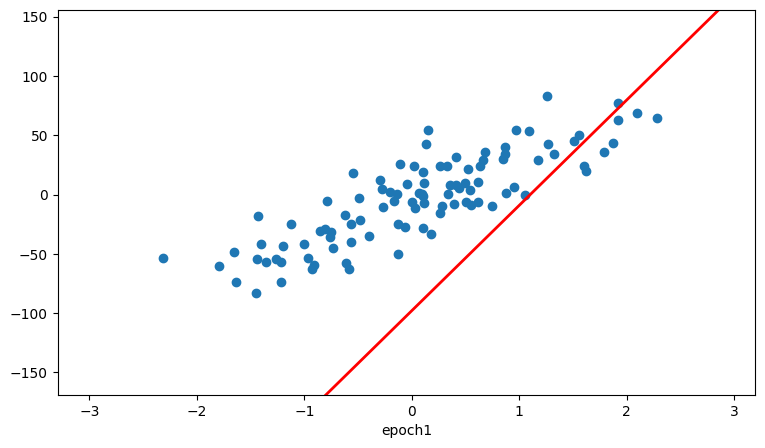

In [130]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize =(9,5))
x_i = np.arange(-3,3,0.1)
y_i = x_i * (-27)-150
ax.scatter(X,y)
line, = ax.plot(x_i, x_i*50-4, 'r-', linewidth =2)

def update(i):
    label='epoch{0}'.format(i+1)
    line.set_ydata(x_i*all_m[i]+all_b[i])
    ax.set_xlabel(label)
    # return line,ax

anim = FuncAnimation(fig,update,repeat=True,frames=epochs,interval=500)


In [131]:
# Batch GD - updation after going through all rows in 1 epoch; updation only after 1 epoch
# Stochastic GD - updation after each row; n rows, n updates 

## Stochastic Gradient Descent

In [132]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [133]:
X,y = load_diabetes(return_X_y=True)

In [134]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [135]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size =0.2,random_state=2)

In [136]:
reg = LinearRegression()

In [138]:
reg.fit(X_train,y_train)

LinearRegression()

In [139]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [140]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [143]:
class SGDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])

        for i in range(epochs):
            for j in range(X_train.shape[0]):
                idx=np.random.randint(0,X_train.shape[0])

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat) 
                # calculating for one one y_hat so no need to take mean, m=1
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
                 
        print(self.coef_,self.intercept_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
        
        

In [150]:
sgd = SGDRegressor(learning_rate=0.01, epochs=100)

In [151]:
sgd.fit(X_train,y_train)

[  64.28040732  -26.39045716  267.04283769  197.84054494   39.53228833
    8.47389372 -150.76347363  131.6754846   255.70749552  120.96189152] 162.11542282028023


In [152]:
y_pred = sgd.predict(X_test)

In [153]:
r2_score(y_test,y_pred)

0.3856056563711521

In [155]:
from sklearn.linear_model import SGDRegressor

In [158]:
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [159]:
reg.fit(X_train,y_train)

C:\Users\Reliance Digital\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=100)

In [160]:
y_pred = reg.predict(X_test)

In [162]:
r2_score(y_test,y_pred)

0.43276752098547755